In [153]:
import numpy as np
import matplotlib.pyplot as plt
from math import radians,cos,sin
import cmath

## 1. Création du signal

on cherche à modéliser un carré pour ce la on va prendre 100 points

### 1.1 Carré

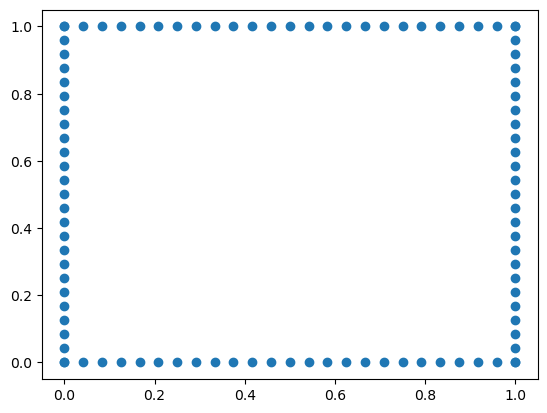

In [154]:
def carré(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    for i in x:
        X.append(i)
        Y.append(0)
    for j in x:
        X.append(long)
        Y.append(j)
    for i in x[::-1]:
        X.append(i)
        Y.append(long)
    for j in x[::-1]:
        X.append(0)
        Y.append(j)
    return X,Y


X,Y=carré(100,1)

plt.scatter(X,Y)


### 1.2 Passage en complexe

In [155]:
def complexification(X,Y):
    L=[]
    for x in range(len(X)):
        L.append(X[x]+1j*Y[x])
    return L

L=complexification(X,Y)

print(L)

[0j, (0.041666666666666664+0j), (0.08333333333333333+0j), (0.125+0j), (0.16666666666666666+0j), (0.20833333333333331+0j), (0.25+0j), (0.29166666666666663+0j), (0.3333333333333333+0j), (0.375+0j), (0.41666666666666663+0j), (0.4583333333333333+0j), (0.5+0j), (0.5416666666666666+0j), (0.5833333333333333+0j), (0.625+0j), (0.6666666666666666+0j), (0.7083333333333333+0j), (0.75+0j), (0.7916666666666666+0j), (0.8333333333333333+0j), (0.875+0j), (0.9166666666666666+0j), (0.9583333333333333+0j), (1+0j), (1+0j), (1+0.041666666666666664j), (1+0.08333333333333333j), (1+0.125j), (1+0.16666666666666666j), (1+0.20833333333333331j), (1+0.25j), (1+0.29166666666666663j), (1+0.3333333333333333j), (1+0.375j), (1+0.41666666666666663j), (1+0.4583333333333333j), (1+0.5j), (1+0.5416666666666666j), (1+0.5833333333333333j), (1+0.625j), (1+0.6666666666666666j), (1+0.7083333333333333j), (1+0.75j), (1+0.7916666666666666j), (1+0.8333333333333333j), (1+0.875j), (1+0.9166666666666666j), (1+0.9583333333333333j), (1+1j

### 1.3 Transformation signal

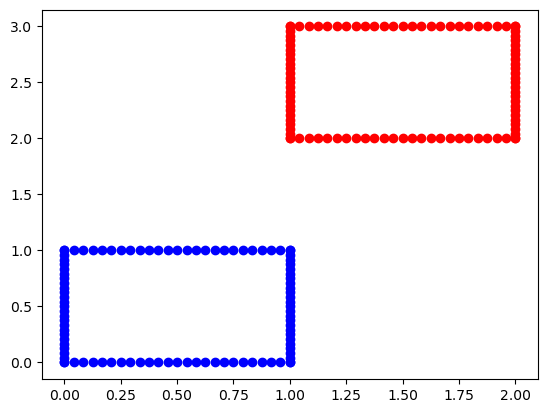

In [156]:
#Translation
def transl(X,Y,x,y):
    Xt=[i+x for i in X]
    Yt=[i+y for i in Y]
    return Xt,Yt

Xt,Yt=transl(X,Y,1,2)
plt.scatter(Xt,Yt,c='red')
plt.scatter(X,Y,c='blue') 

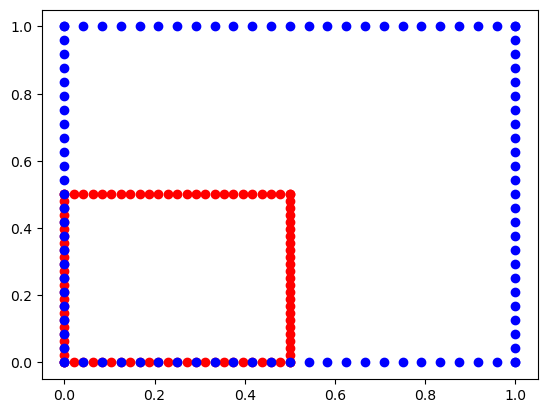

In [157]:
#Homotéthie
def homot(X,Y,a):
    Xh=[i*a for i in X]
    Yh=[i*a for i in Y]
    return Xh,Yh

Xh,Yh=homot(X,Y,0.5)
plt.scatter(Xh,Yh,c='red')
plt.scatter(X,Y,c='blue')

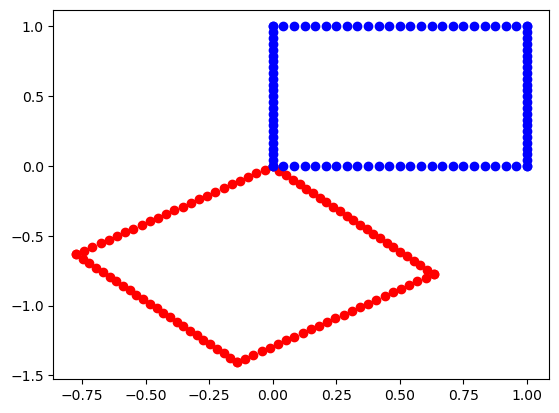

In [158]:
#Rotation
#z'=z*e_{i*theta}
def rotat(X,Y,angle):
    L=complexification(X,Y)
    theta = cmath.phase(cmath.exp(complex(0,1)) * np.exp(complex(0,angle*(np.pi/100))))
    rot=[i* np.exp(complex(0,theta)) for i in L]
    Xr=[i.real for i in rot]
    Yr=[i.imag for i in rot]
    return Xr,Yr

Xr,Yr=rotat(X,Y,90)
plt.scatter(Xr,Yr,c='red')
plt.scatter(X,Y,c='blue')

## 2. Décomposition de fourrier

In [159]:
def fourrier_decompo(Liste_complexes,f):
    n=len(Liste_complexes)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for x in range(n)]]
    L=np.array(Liste_complexes)
    return np.sum(vect_exp*L.T)

list_fourrier=[fourrier_decompo(L,x) for x in range(len(L))]
print(list_fourrier)

[(50+50j), (-39.579341819034795-42.14771814851596j), (-3.552713678800501e-15-1.7763568394002505e-15j), (-4.440892098500626e-15+1.3322676295501878e-15j), (-1.7763568394002505e-15+7.993605777301127e-15j), (-1.176498131654629-1.619310757877555j), (8.881784197001252e-15-1.0658141036401503e-14j), (-2.220446049250313e-15+1.099120794378905e-14j), (-1.0658141036401503e-14-4.884981308350689e-15j), (-0.24847809437339596-0.4519799757625207j), (-2.886579864025407e-15-1.6431300764452317e-14j), (1.7541523789077473e-14-1.3322676295501878e-15j), (-6.994405055138486e-15-1.1102230246251565e-14j), (-0.07159847996122659-0.18083711778477696j), (3.774758283725532e-14+2.19824158875781e-14j), (-9.769962616701378e-15-5.329070518200751e-15j), (-3.8413716652030416e-14-1.2434497875801753e-14j), (-0.01988972453425797-0.07746536251638236j), (2.4313884239290928e-14-2.5979218776228663e-14j), (4.7628567756419216e-14+7.749356711883593e-14j), (-3.5638159090467525e-14+6.439293542825908e-15j), (-0.003484672788490295-0.027

### 3. $TF^{-1}$

In [160]:
def tf_1(coeff_fourriers,k,x):  #k correspond au p de l'équation du cours (Cp)
    n=len(coeff_fourriers)
    vect_exp=[[np.exp(-2*np.pi*1j*x*f/n) for f in range(k)]]
    L=np.array(coeff_fourriers[0:k])
    return 1/n*np.sum(vect_exp*L.T)

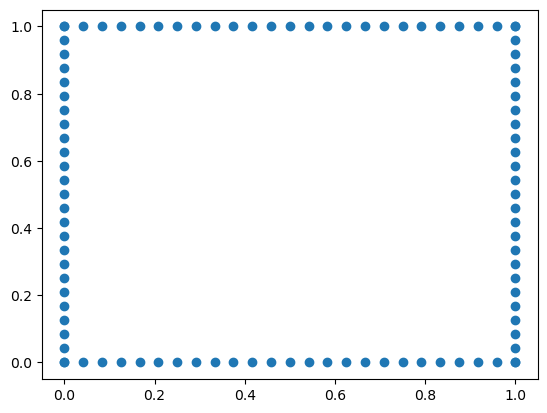

In [161]:
long=len(L)
s_reconstruit=[tf_1(list_fourrier,100,x) for x in range(long)] #kmax=100, kmin=2

X=[x.real for x in s_reconstruit]
Y=[y.imag for y in s_reconstruit]

plt.scatter(X,Y)

In [162]:
#Modules de C_p invariants par rotation
#Si on n'utilise pas C_0, on devient invariant par translation
#On prend les (C_i/C_1) pour devenir invariant par homothétie

True True True True


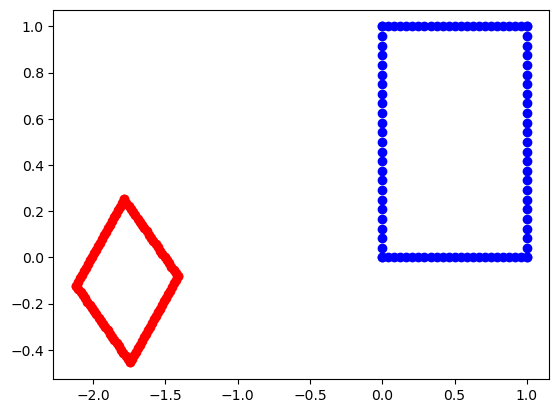

In [163]:
#f pour forme (X,Y)
def compare(f1,f2):
    if len(f1[0])!=len(f2[0]): return False
    else:
        l=len(f1[0])
        L1,L2=complexification(f1[0],f1[1]),complexification(f2[0],f2[1])
        lc1,lc2=[fourrier_decompo(L1,x) for x in range(l)],[fourrier_decompo(L2,x) for x in range(l)]
        compar=[abs(lc1[i])/abs(lc1[1]) - abs(lc2[i])/abs(lc2[1])  for i in range(2,l)]
        boo=True
        i=0
        while boo and i<l-2:
            boo=compar[i]<10**-10
            i+=1
    return boo

#f1 Originale:
X,Y=carré(100,1)

#f2 Rotation:
X2,Y2=rotat(X,Y,90)

#f3 Translation:
X3,Y3=transl(X,Y,1,2)

#f4 Homotéthie
X4,Y4=homot(X,Y,1.5)

#f5 Trois modifications:
X5,Y5=homot(X,Y,0.5)
X5,Y5=transl(X5,Y5,1,1)
X5,Y5=rotat(X5,Y5,45)

plt.scatter(X5,Y5,c='red')
plt.scatter(X,Y,c='blue') 

#Comparaison:
result1=compare((X,Y),(X2,Y2))
result2=compare((X,Y),(X3,Y3))
result3=compare((X,Y),(X4,Y4))
result4=compare((X,Y),(X5,Y5))
print(result1,result2,result3,result4)

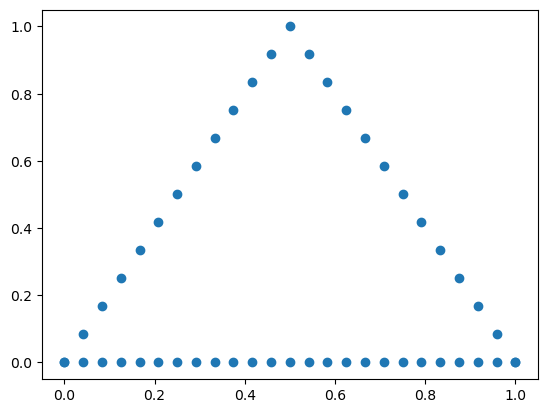

In [164]:
#Vérif avec triangle équilatéral:
def tri(n,long):
    X=[]
    Y=[]
    x=np.linspace(0,long,n//4)
    l=len(x)
    for i in x:
        X.append(i)
        Y.append(0)
    for i in x[l//2:]:
        X.append(i)
        Y.append(-2*i+2*long)
    for i in x[0:l//2]:
        X.append(i)
        Y.append(2*i)
    return X,Y

X,Y=tri(100,1)
#print(X,Y)
plt.scatter(X,Y)

True True True True


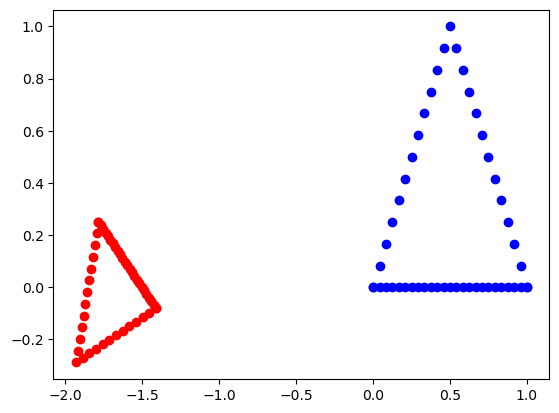

In [165]:
#f1 Originale:
X,Y=tri(100,1)

#f2 Rotation:
X2,Y2=rotat(X,Y,90)

#f3 Translation:
X3,Y3=transl(X,Y,1,2)

#f4 Homotéthie
X4,Y4=homot(X,Y,1.5)

#f5 Trois modifications:
X5,Y5=homot(X,Y,0.5)
X5,Y5=transl(X5,Y5,1,1)
X5,Y5=rotat(X5,Y5,45)

plt.scatter(X5,Y5,c='red')
plt.scatter(X,Y,c='blue')

#Comparaison:
result1=compare((X,Y),(X2,Y2))
result2=compare((X,Y),(X3,Y3))
result3=compare((X,Y),(X4,Y4))
result4=compare((X,Y),(X5,Y5))
print(result1,result2,result3,result4)

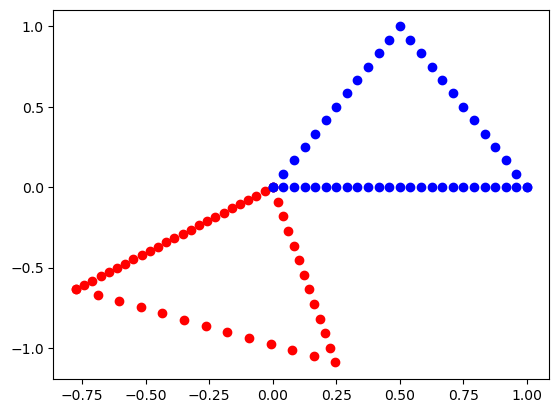

In [166]:
plt.scatter(X2,Y2,c='red')
plt.scatter(X,Y,c='blue') 

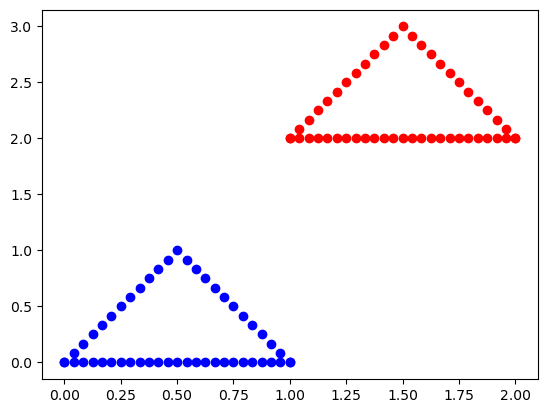

In [167]:
plt.scatter(X3,Y3,c='red')
plt.scatter(X,Y,c='blue') 

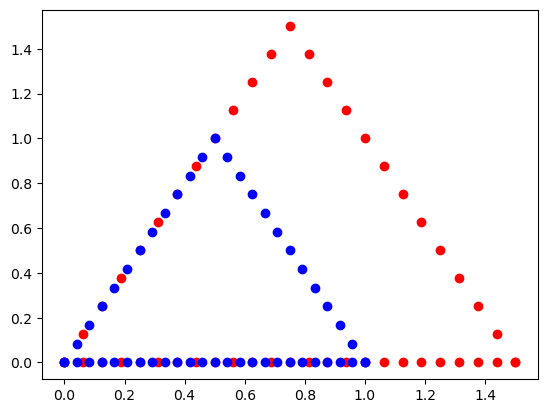

In [168]:
plt.scatter(X4,Y4,c='red')
plt.scatter(X,Y,c='blue') 